## Compare Cellpose3/Cellpose4 cyto3/cpsam



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


4.0.1
4


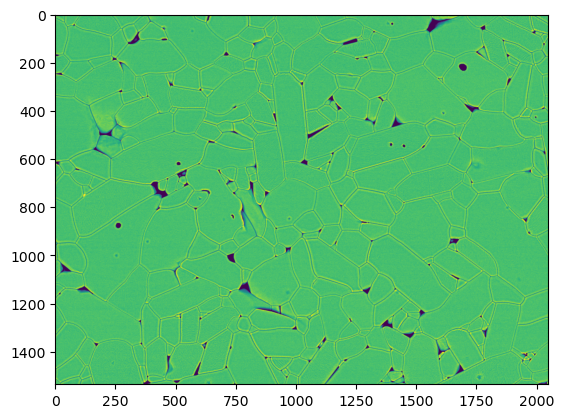

In [ ]:
import napari
import glob
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
import napari
import cellpose

image = imread("211122_AM_Al2O3_SE_021.ome.tiff")

plt.imshow(image)

print(cellpose.version)

In [2]:
from cellpose import models, io
from skimage.io import imsave

model = models.CellposeModel(gpu=True)
result = model.eval(image, niter=2000)

result_name = 'result_defaults_'+ cellpose.version + '.tif'
imsave(result_name, result[0])

model = models.CellposeModel(gpu=True, model_type='cyto3')

result_name = 'result_cyto3_CPM_' + cellpose.version + '.tif'
imsave(result_name, result[0])

try:
    model = models.Cellpose(gpu=True, model_type='cyto3')
    result = model.eval(image, niter=2000)
    result_name = 'result_cyto3_CP_' + cellpose.version + '.tif'
    imsave(result_name, result[0])
except:
    print("Call to model.Cellpose failed in version " + cellpose.version)

c:\Users\bnort\miniconda3\envs\microsam_cellose_sam\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: result_defaults_4.0.1.tif is a low contrast image
  return func(*args, **kwargs)
model_type argument is not used in v4.0.1+. Ignoring this argument...


Call to model.Cellpose failed in version 4.0.1


c:\Users\bnort\miniconda3\envs\microsam_cellose_sam\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: result_cyto3_CPM_4.0.1.tif is a low contrast image
  return func(*args, **kwargs)


In [ ]:

viewer = napari.Viewer()
viewer.add_image(image, name='image')

# Get all files starting with 'result_' and ending with common image extensions
image_files = glob.glob("result_*.tif") 

for image_file in image_files:
    # Read the image file
    image_data = imread(image_file)
    
    # Add the image to the viewer
    viewer.add_labels(image_data, name=image_file)